### Today's content
* Preprocessing contains
* image reading and slicing



### 3. Robust Scalar
-  If data set contains large amount of outliers, then robust scalar is best technique
- scaling between inter quartile range (25% to 75%)
*  formula
  * [Xi- median(X)] / [Q3(X)-Q1(X)]
- Q1 - 25% [LOWER QUARTILE]
- Q2 - 50% Median
- Q3 - 75% [UPPER QUARTILE]

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/nagamounika5/Datasets/master/Advertisement.csv')

In [3]:
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
df.drop(['Unnamed: 0'], axis=1, inplace= True)

In [5]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [6]:
df.shape

(200, 4)

In [7]:
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [8]:
import matplotlib.pyplot as plt

In [9]:
df.tail()

,TV,radio,newspaper,sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,13.4


In [10]:
df.quantile(0.25)

TV           74.375
radio         9.975
newspaper    12.750
sales        10.375
Name: 0.25, dtype: float64

In [11]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [12]:
(38.2 -149.75)/( 218.825-74.375)


-0.7722395292488751

In [13]:
### Apply Robust Scalar model

In [14]:
from sklearn.preprocessing import RobustScaler

In [15]:
rb1 = RobustScaler()
rb1

RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True)

In [16]:
rb2 = rb1.fit_transform(df)

In [17]:
rb2= pd.DataFrame(rb2, columns = df.columns)

In [18]:
rb2


,TV,radio,newspaper,sales
0,0.556248,0.561205,1.343122,1.309609
1,-0.728626,0.617702,0.598145,-0.355872
2,-0.917619,0.866290,1.346213,-0.512456
3,0.012115,0.693032,1.012365,0.797153
4,0.214953,-0.455744,1.009274,0.000000
...,...,...,...,...
195,-0.772240,-0.723164,-0.369397,-0.754448
196,-0.384562,-0.677966,-0.545595,-0.455516
197,0.188647,-0.512241,-0.598145,-0.014235
198,0.926618,0.719397,1.250386,1.793594


In [19]:
import seaborn as sns

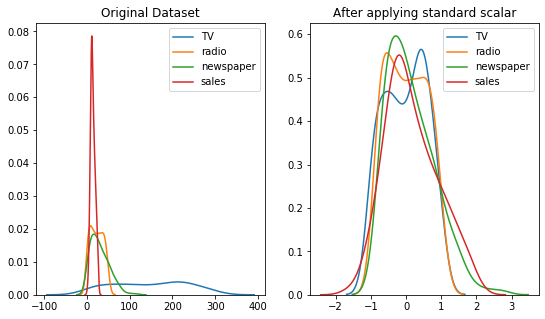

In [22]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize =(9,5))

ax1.set_title('Original Dataset')
sns.kdeplot(df['TV'], ax = ax1)
sns.kdeplot(df['radio'], ax = ax1)
sns.kdeplot(df['newspaper'], ax = ax1)
sns.kdeplot(df['sales'], ax = ax1)

ax2.set_title('After applying standard scalar')
sns.kdeplot(rb2['TV'], ax = ax2)
sns.kdeplot(rb2['radio'], ax = ax2)
sns.kdeplot(rb2['newspaper'], ax = ax2)
sns.kdeplot(rb2['sales'], ax = ax2)